# DIOMIRA

Leaving there and proceeding for three days toward the east, you reach Diomira, a city with sixty silver domes, bronze statues of all the gods, streets paved with lead, a crystal theater, a golden cock that crows every morning on a tower. All these beauties will already be familiar to the visitor, who has seen them also in other cities. But the special quality of this city for the man who arrives there on a September evening, when the days are growing shorter and the multicolored lamps are lighted all at once at the doors of the food stalls and from a terrace a woman's voice cries ooh!, is that he feels envy toward those who now believe they have once before lived an evening identical to this and who think they were happy, that time.

In [1]:
from __future__ import print_function

In [2]:
from IPython.display import Image

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


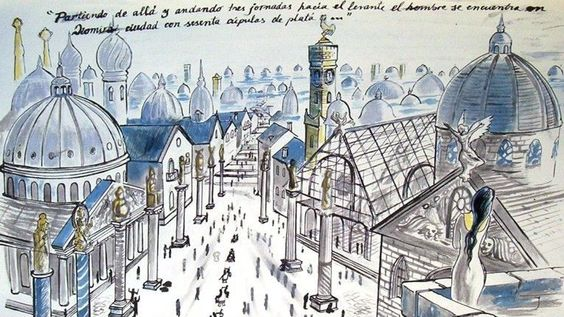

In [4]:
Image(filename='../Images/Diomira.jpg') 

## DIOMIRA notebook 

Notes for DIOMIRA script.

DIOMIRA Script:
        1. Reads an Nh5 file produced by art/centella, which stores the
            pre-raw data (PRD) (number of pes) for the PMTs and SiPMs waveforms, as well as
            data on geometry, sensors and MC.

        2. Simulates the response of the energy plane in the PMTs PRD, and
            outputs PMT Raw-Data (RD), e.g., waveforms in bins of 25 ns
            which correspond to the output of the EP FEE.
            
        3. Simulates the response of the tracking plane in the SiPMs PRDs and outputs
            SiPM RD (not yet implemented, for the time being simply copy the SiPM PRD)

        4. Adds two new vectors, storing the total energy in pes (true MC) for each PMT and each SiPM

        5. Add a table describing the FEE parameters used for simulation

        6. Copies the tables on geometry, detector data and MC

In [5]:
import matplotlib.pyplot as plt

In [6]:
ipath='/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/'

In [7]:
opath='/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/'

In [18]:
ifile="WF_Tl_0.h5"

In [16]:
ofile="WF_Tl_0_RWF.h5"

In [9]:
import pandas as pd

In [10]:
import tables as tb

#### input file (1ns waveforms)

In [20]:
ipath

'/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/'

In [21]:
ifile

'WF_Tl_0.h5'

In [22]:
ipath+ifile

'/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF_Tl_0.h5'

In [25]:
%ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF_Tl_0.h5'

-rw-r--r--  1 jjgomezcadenas  staff    26M Aug  4 17:08 /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF_Tl_0.h5


In [26]:
opath+ofile

'/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Tl_0_RWF.h5'

In [27]:
%ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Tl_0_RWF.h5'

-rw-r--r--  1 jjgomezcadenas  staff    65M Aug 11 15:50 /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Tl_0_RWF.h5


<font color='red'>Notice that the output file is larger than the input file in spite of the fact that the Waveforms stored in RWF are much smaller in size (by a factor 25) than the 1ns Waveforms. A possible reason for that: In the 1ns Waveforms most of the data are ceros, which can be efficiently removed by the compressor, while in the RWF data, we have introduced noise and the effect of the FEE. The baseline fluctuates around cero but is not exactly cero and thus cannot be removed so efficiently (tbc by FA)</font>

In [11]:
h5in = tb.open_file(ipath+ffile, "r+") 

In [12]:
h5in

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF_Tl_0.h5, title='', mode='r+', root_uep='/', filters=Filters(complevel=9, complib='blosc', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/pmtrd (EArray(99, 12, 599999), shuffle, blosc(9)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 131072)
/sipmrd (EArray(99, 1792, 600), shuffle, blosc(9)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 109, 600)
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) 'DetectorGeometry'
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)
/MC (Group) ''
/MC/MCTracks (Table

#### out file

In [13]:
h5out = tb.open_file(opath+ffile, "r") 

In [14]:
h5out

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Tl_0.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=9, complib='blosc', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) 'DetectorGeometry'
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
  description := {
  "offset": Int16Col(shape=(), dflt=0, pos=0),
  "pmt_gain": Float32Col(shape=(), dflt=0.0, pos=1),
  "V_gain": Float32Col(shape=(), dflt=0.0, pos=2),
  "R": Float32Col(shape=(), dflt=0.0, pos=3),
  "C12": Float32Col(shape=(12,), dflt=0.0, pos=4),
  "time_step": Float32Col(shape=(), dflt=0.0, pos=5),
  "time_daq": Flo

In [ ]:
h5out = tb.open_file(opath+ffile, "r+")

In [ ]:
h5out

### Functions to manipulate geomety and sensor data

In [ ]:
def read_data_geom(geom_t):
    """
    Reads the geom data en returns a PD Series
    """
        
    ga = geom_t.read()
    G ={}
    G = pd.Series([ga[0][0][0],ga[0][0][1],ga[0][1][0],ga[0][1][1],
                    ga[0][2][0],ga[0][2][1],ga[0][3]],
                    index=['xdet_min','xdet_max','ydet_min','ydet_max',
                            'zdet_min','zdet_max','R'])
    return G

In [ ]:
def FEE_param():
    """
    Stores the parameters of the EP FEE simulation as a pd Series
    """
    import FEParam as FP
    fp = pd.Series([FP.offset,FP.PMT_GAIN,FP.V_GAIN,FP.R,FP.time_step,FP.time_DAQ,
                    FP.freq_LPF,1./(2*pi*FP.R*FP.C),FP.LSB,FP.voltsToAdc/volt,
                    FP.NOISE_FEE,FP.NOISE_ADC], 
                    index=['offset','pmt_gain','V_gain','R',
                                'time_step','time_daq','freq_LPF',
                                'freq_HPF','LSB','volts_to_adc',
                                'noise_fee_rms','noise_adc'])
    return fp

In [ ]:
def get_column(pmta,ic):
    """
    access column ic of table pmta and returns column as an array
    """
    col =[]
    for i in range(pmta.shape[0]):
        col.append(pmta[i][ic])
    return np.array(col)
 
def read_data_sensors(sensor_table):
    """
    reads the sensors table and returns a data frame
    """
    pmta = sensor_table.read()
    PMT={}
    PMT['channel'] = get_column(pmta,0)
    PMT['active'] = get_column(pmta,1)
    PMT['x'] = get_column(pmta,2).T[0]
    PMT['y'] = get_column(pmta,2).T[1]
    PMT['gain'] = get_column(pmta,3)
    PMT['adc_to_pes'] = get_column(pmta,4)
        
    return pd.DataFrame(PMT)

In [ ]:
PATH_IN ="/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/"

In [ ]:
FILE = "WF_Tl_0.h5"

In [ ]:
ffile = PATH_IN+FILE

In [ ]:
h5in = tb.open_file(ffile, "r+") 

In [ ]:
geom_t = h5in.root.Detector.DetectorGeometry
pmt_t = h5in.root.Sensors.DataPMT
sipm_t = h5in.root.Sensors.DataSiPM

In [ ]:
pmtdf = read_data_sensors(pmt_t)

In [ ]:
pmtdf

In [ ]:
pmtdf = read_data_sensors(sipm_t)

In [ ]:
sipmdf

In [ ]:
gepmdf = read_data_geom(geom_t)

In [ ]:
gepmdf

### Tests for storing Pandas objects in HDF5

In [ ]:
store_export = pd.HDFStore('/Users/jjgomezcadenas/Documents/Development/NEXT/data/test/dst.h5')

In [ ]:
store_export.append('Sensors/DataPMT', pmtdf, data_columns=pmtdf.columns)

In [ ]:
store_export

In [ ]:
store_export.append('Sensors/DataSiPM', sipmdf, data_columns=sipmdf.columns)

In [ ]:
store_export

In [ ]:
store_export.close()

In [ ]:
store = pd.HDFStore('/Users/jjgomezcadenas/Documents/Development/NEXT/data/test/dst.h5')

In [ ]:
store

In [ ]:
dfPMT = store.select('Sensors/DataPMT')

In [ ]:
dfPMT

In [ ]:
store_export = pd.HDFStore('/Users/jjgomezcadenas/Documents/Development/NEXT/data/test/dst.h5')

In [ ]:
store_export.append('Detector/DetectorGeometry', gepmdf)

In [ ]:
store_export

In [ ]:
store_export.close()

In [ ]:
store_export = pd.HDFStore('/Users/jjgomezcadenas/Documents/Development/NEXT/data/test/dst.h5')

In [ ]:
geom = store.select('Detector/DetectorGeometry')

In [ ]:
geom

In [ ]:
feep = FEE_param()

In [ ]:
feep

In [ ]:
from system_of_units import *

In [ ]:
feep['V_gain']/ohm

In [ ]:
feep['LSB']/volt

In [ ]:
feep['noise_fee_rms']/mV

In [ ]:
sensor_energy(0,pmtdf,sipmdf)

In [ ]:
pmtdf

In [ ]:
sipmdf

In [ ]:
x = sipmdf.ix['pes']

In [ ]:
e = [ene for ene in x if ene > 0]

In [ ]:
e

In [ ]:
def plot_sensor(sdf, rd):
    plt.figure(figsize=(10,10))
    ax = plt.subplot(aspect='equal')
    x =[]
    y =[]
    r =[]
    col = []
    for i in sdf.columns:
        sensor = sdf[i]
        x.append(sensor['x'])
        y.append(sensor['y'])
        r.append(rd)
        col.append(sensor['pes'])
    circles(x, y, r, c=col, alpha=0.5, ec='none')
    plt.colorbar()
    xlim(-198,198)
    ylim(-198,198)

In [ ]:
plot_sensor(pmtdf,10)

In [ ]:
plot_sensor(sipmdf,2)

In [ ]:
def get_mctrk(event_number):
    with tb.open_file(path+ffile, "r") as h5in:
        table = h5in.root.MC.MCTracks
        mcparticle ={}
        mc_name = []
        mc_pdg = []
        mc_vxi = []
        mc_vxf= []
        mc_nhits= []
        mc_energy= []
        for row in table.iterrows():
            if row['hit_indx'] == 0 and row['event_indx'] == event_number:
                mc_name.append(row['particle_name'])
                mc_pdg.append(row['pdg_code'])
                mc_vxi.append(row['initial_vertex'])
                mc_vxf.append(row['final_vertex'])
                mc_nhits.append(row['nof_hits'])
                mc_energy.append(row['energy']*1000.) #keV
                
        mcparticle['name'] = mc_name
        mcparticle['pdg'] = mc_pdg
        mcparticle['vxi'] = mc_vxi
        mcparticle['vxf'] = mc_vxf
        mcparticle['nhits'] = mc_nhits
        mcparticle['energy'] = mc_energy
                
    return pd.DataFrame(mcparticle)

In [ ]:
d = get_mctrk(1)

In [ ]:
d

In [ ]:
def get_mctrks(events):
    """
    events is a list of events
    """
    particles={}
    for event_number in events:
        particles[event_number] = get_mctrk(event_number)
    
    return pd.Panel(particles)

In [ ]:
particles = get_mctrks(range(5))

In [ ]:
particles

In [ ]:
p4 = particles[4]

In [ ]:
p4

In [ ]:
def get_hits_from_mctrk(event_number, mctrk_indx):
    with tb.open_file(path+ffile, "r") as h5in:
        table = h5in.root.MC.MCTracks
        hits ={}
        hit_position = []
        hit_time = []
        hit_energy = []
        
        for row in table.iterrows():
            if row['mctrk_indx'] == mctrk_indx and row['event_indx'] == event_number:
                hit_position.append(row['hit_position'])
                hit_time.append(row['hit_time'])
                hit_energy.append(row['hit_energy']*1000.)
                
                
        hits['pos'] =  hit_position
        hits['time'] = hit_time
        hits['energy'] = hit_energy
        
    return pd.DataFrame(hits)

In [ ]:
hits = get_hits_from_mctrk(0, 3)

In [ ]:
hits

In [ ]:
get_mctrk(0)

In [ ]:
mctrkp =get_mctrks(range(99))

In [ ]:
mctrkp[0].dropna()

In [ ]:
mctrkp.shape[0]

In [ ]:
def get_particle_energy(mctrkp,pdg):
    """
    mctrkp is a panel
    """
    energy=[]
    
    for i in range(mctrkp.shape[0]):
        mcdf =mctrkp[i].dropna()
        for r in mcdf.itertuples():
            if r[4] == pdg:
                energy.append(r[1])
           
    return pd.Series(energy)

In [ ]:
mcdf =mctrkp[0].dropna()

In [ ]:
mcdf

In [ ]:
for r in mcdf.itertuples():
    print(r[1])

In [ ]:
for r in mcdf.iterrows():
    print(r)

In [ ]:
ee = get_particle_energy(mctrkp,11)

In [ ]:
plt.hist(ee, 20, histtype='bar')

In [ ]:
ee = get_particle_energy(mctrkp,22)

In [ ]:
plt.hist(ee, 20, histtype='bar')

In [ ]:
mctrkp[1].dropna()

In [ ]:
hits = get_hits_from_mctrk(1, 0)

In [ ]:
hits

In [ ]:
dfq = pd.DataFrame(randn(10,4),columns=list('ABCD'),index=pd.date_range('20130101',periods=10))

In [ ]:
dfq

In [ ]:
store = pd.HDFStore('/Users/jjgomezcadenas/Documents/Development/NEXT/data/test/store.h5')

In [ ]:
store

In [ ]:
store.append('dfq',dfq,format='table',data_columns=True)

In [ ]:
store

In [ ]:
store.select('dfq', "columns=['A', 'B']")